# THE BATTLE OF NEIGHBORHOODS

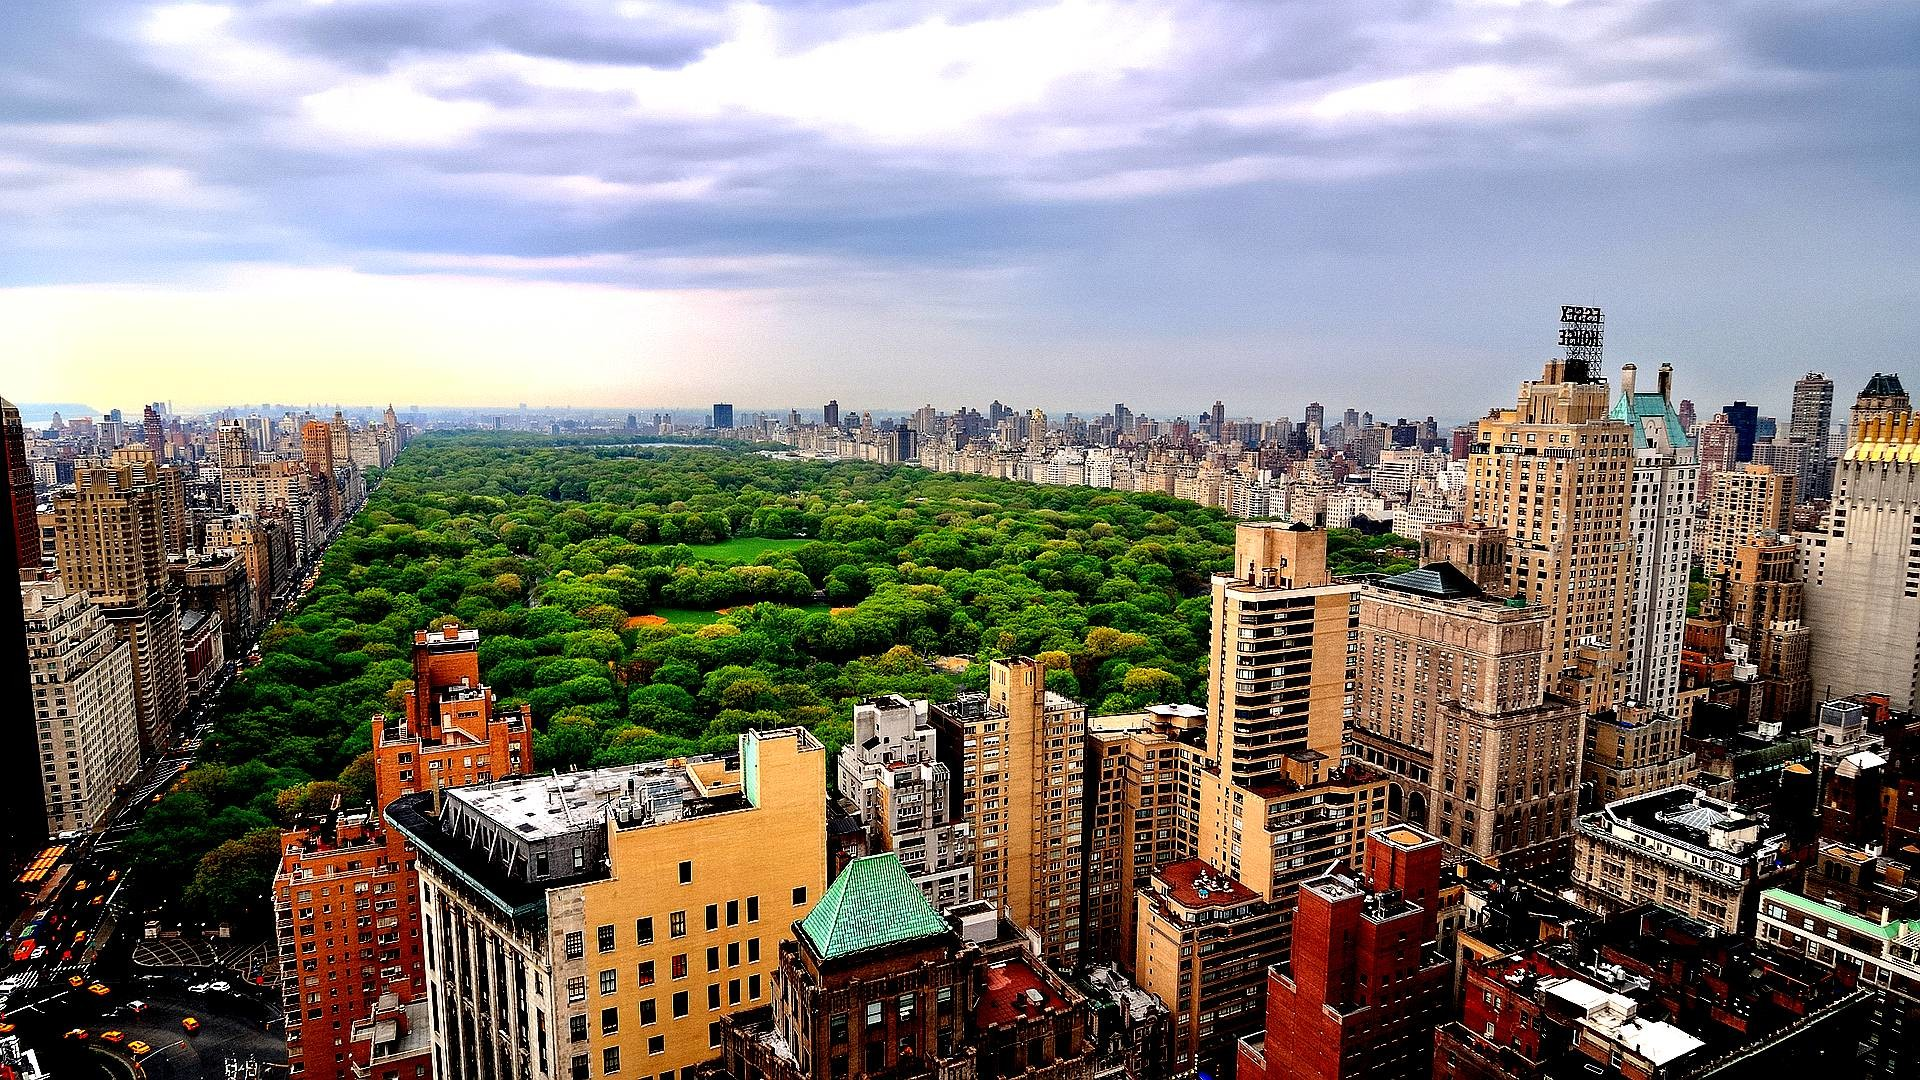

In [3]:
from IPython.display import Image
Image(filename='nyc.jpg') 




## 1. Introduction and Business Problem Statement
__New York City__ is the most populous city in the United States with estimated population of around __8.4 Million__. It is also the most densly populated city in the United States. With over __3.2 Million__ residents born outside the US, NYC is one of the most ethnically diverse cities. As we all know, with ethnic diversity comes diversity of cuisines. 
NYC is home to more than __27,000__ restaurants with Queens alone serving food from around __85__ Countries.

> _The city is home to "nearly one thousand of the finest and most diverse haute cuisine restaurants in the world"_  
  -Michelin

As a part of the Coursera Applied Data Science Capstone Project, we are going to explore the various restaurants based on their ratings and neighborhoods and cluster them together to visualize neighborhoods based on their famous cuisines.

- Target Audience - Curious Foodies wanting to explore cuisine in NYC  

_Even though this notebook gives a crude idea, it can be converted to a feasible interactive user interface later on._

## 2. Data
New York City has a total of _5 boroughs_ and _306 neighborhoods_. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 
The dataset mentioned below contains each Neighborhood stored as a key Feature on JSON format. 

- NYC Boroughs/Neighborhood Geospatial Dataset (Raw) : https://geo.nyu.edu/catalog/nyu_2451_34572  


- NYC Boroughs/Neighborhood Geospatial Dataset (Cleaned) : https://cocl.us/new_york_dataset

Alongside this data, we are going to use the Foursquare API to get venue details for each neighborhood in the above dataset classified under Food Category.

- Venue details: https://developer.foursquare.com/


- Food Category: 4d4b7105d754a06374d81259  


- Geospatial Coordinated for testing data: Geopy Library - https://geopy.readthedocs.io/en/stable/


__We will explore the NYC neighborhood dataset below__  
Venues/Restaurants will be visualized later on in Part 2

In [5]:
## Import the required libraries
import pandas as pd
import numpy as np
import geopy
from geopy.geocoders import Nominatim
import json # library to handle JSON files

print('Libraries imported')

Libraries imported


In [6]:
# Let's download and explore the above mentioned datasets
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [7]:
# Open the json file containing NYC data and display a feature
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)  

In [15]:
# newyork_data ##Uncomment to print whole json data

In [16]:
## Load the neighborhood data that is store in features in above data
neighborhoods_data = newyork_data['features']

In [26]:
## Display neighborhood data -  1st element
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [28]:
## Import Folium to display maps
import folium
print('Folium Library imported')

Folium Library imported


In [31]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [32]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [33]:
## Storing only the required data in a dataframe from above dictionaries
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [38]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [41]:
neighborhoods.shape ## 306 neighborhoods and 5 boroughs

(306, 4)

In [42]:
from geopy.geocoders import Nominatim
# from url import Nominatim
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [73]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)
map_newyork

In [79]:
neighborhoods.Borough.unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [99]:
address = 'Staten Island, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Staten Island are 40.5834557, -74.1496048.


In [104]:
folium.Marker([40.7896239, -73.9598939], popup='Manhattan',icon=folium.Icon(color='blue')).add_to(map_newyork)
folium.Marker([40.7498243, -73.7976337], popup='Queens',icon=folium.Icon(color='darkred')).add_to(map_newyork)
folium.Marker([40.8466508, -73.8785937], popup='Bronx',icon=folium.Icon(color='green')).add_to(map_newyork)
folium.Marker([40.6501038, -73.9495823], popup='Brooklyn',icon=folium.Icon(color='purple')).add_to(map_newyork)
folium.Marker([40.5834557, -74.1496048], popup='Staten Island',icon=folium.Icon(color='orange')).add_to(map_newyork)

In [82]:
for lat, lng, borough,neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'],neighborhoods['Borough'], neighborhoods['Neighborhood']):
    poptext = '{},{}'.format(neighborhood, borough)
    neigh = folium.Popup(poptext, parse_html=True)
    if borough =='Manhattan':
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=neigh,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork)  
    if borough =='Staten Island':
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=neigh,
            color='yellow',
            fill=True,
            fill_color='#fcba03',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork)  
    if borough =='Bronx':
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=neigh,
            color='green',
            fill=True,
            fill_color='#78f76d',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork) 
    if borough =='Queens':
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=neigh,
            color='red',
            fill=True,
            fill_color='#ff3355',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork)
    if borough =='Brooklyn':
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=neigh,
            color='purple',
            fill=True,
            fill_color='#f98fff',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork) 

In [106]:
map_newyork

# Part 2  
# Sections for Week 5
***

## Methodology
Methodology Section


## Results
Result Section


## Discussion
Discussion Section


## Conclusion
Conclusion Section